Import Both input and response file

In [1]:
#!pip install pandas
import pandas as pd
pd.set_option('display.max_rows', None)
df_input = pd.read_csv('example_explanatory_variables.csv')
df_output = pd.read_csv('example_response_variable.csv')
X = df_input
y= df_output['V1']
print(y)

0        19.7720
1         0.0000
2         7.1422
3         4.2385
4         9.7755
5         5.1525
6         3.5232
7        32.0410
8        25.1860
9         3.1088
10       21.7530
11       13.4510
12       12.9360
13       22.0270
14        9.4920
15       20.7300
16        6.6316
17       14.5710
18       22.7510
19        9.1091
20        8.7423
21       22.9040
22       18.3650
23       10.4180
24        2.3186
25       11.1860
26       11.8640
27       14.4880
28       12.2050
29        6.5129
30       15.3070
31       34.0230
32       21.9970
33       37.2390
34       10.6900
35       23.5540
36       50.5260
37       62.1040
38       46.0880
39       60.3730
40       61.7270
41       63.4630
42       64.1380
43       52.3760
44       41.8790
45       49.0180
46       45.3750
47       39.3080
48        0.0000
49       15.7300
50       19.1860
51        6.6400
52        0.0000
53       15.7300
54       94.3230
55       84.0370
56       69.5810
57       98.5840
58       87.55

Replace elements

In [2]:
X['Orientation'] = X.Orientation.astype(str)
Ori = pd.get_dummies(X.Orientation)
X = X.join(Ori)
X.dtypes 
X = X.drop('Orientation' ,axis = 1)

Bk = pd.get_dummies(X.Backbone)
X = X.join(Bk)
X = X.drop('Backbone', axis = 1 )

OD = pd.get_dummies(X.OligoDensity)
X = X.join(OD, how='right')
X = X.drop('OligoDensity', axis = 1)

AT = pd.get_dummies(X.Attachment)
X = X.join(AT)
X = X.drop('Attachment', axis = 1)

#X.loc[(X.Lipid == '100%'), 'Lipid' ] = 1
#X.loc[(X.Lipid == '80%'), 'Lipid' ] = 0.8

#X['Size'] = X.Size.astype(str)
#Si = pd.get_dummies(X.Size)
#X = X.join(Si)
#X = X.drop('Size' ,axis = 1)

X['Lipid'] = X.Lipid.astype(str)
Li = pd.get_dummies(X.Lipid)
X = X.join(Li) 
X = X.drop('Lipid' ,axis = 1)

X['OligoConc'] = X.OligoConc.astype(str)
OC = pd.get_dummies(X.OligoConc)
X = X.join(OC) 
X = X.drop('OligoConc' ,axis = 1)

X = X[['1','10','100','1000','Chol','DOPE','PO','PS','3','5','High' ,'Low', 'VHigh','PeptideDensity','100%','80%','Size']]
print(X.head(10))

   1  10  100  1000  Chol  DOPE  PO  PS  3  5  High  Low  VHigh  \
0  1   0    0     0     1     0   1   0  1  0     0    1      0   
1  1   0    0     0     1     0   1   0  1  0     0    1      0   
2  1   0    0     0     1     0   1   0  1  0     0    1      0   
3  1   0    0     0     1     0   1   0  1  0     0    1      0   
4  1   0    0     0     1     0   1   0  1  0     0    1      0   
5  1   0    0     0     1     0   1   0  1  0     0    1      0   
6  1   0    0     0     1     0   1   0  1  0     0    1      0   
7  1   0    0     0     1     0   1   0  1  0     0    1      0   
8  1   0    0     0     1     0   1   0  1  0     0    1      0   
9  1   0    0     0     1     0   1   0  1  0     0    1      0   

   PeptideDensity  100%  80%  Size  
0            0.00     1    0    50  
1            0.00     1    0    80  
2            0.05     1    0    50  
3            0.05     1    0    80  
4            0.50     1    0    50  
5            0.50     1    0    80  
6  

In [3]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [4]:
print(regr.coef_)

[-2.86564742e+02 -1.34921781e+02  1.07999273e+02  3.13487249e+02
  7.23668268e+01 -7.23668268e+01 -2.65259374e+01  2.65259374e+01
 -2.55233749e+01  2.55233749e+01  1.48264132e+00  8.78660660e+00
 -1.02692479e+01 -2.13949204e+01  9.55878646e-01 -9.55878646e-01
  1.43791974e-01]


In [5]:
Pred = regr.predict(X.head(200))

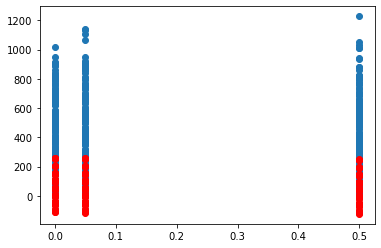

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X.PeptideDensity,y)
plt.scatter(X.PeptideDensity.head(200),Pred,c = "red")

K-fold cross-validation to get Q2 value (k-folds = 5)

In [7]:
import warnings
import math
import numpy
def getQ2(test_pred, test_res, rand_res): 

# this function calculates Q2 values

  # set up squared total error and squared residual error
    SS_tot = 0
    SS_res = 0
  
    # continuous variable
      # accumulate errors
    SS_tot = SS_tot + sum(numpy.square(numpy.subtract(test_res,rand_res)))
    SS_res = SS_res + sum(numpy.square(numpy.subtract(test_res,test_pred)))
    
  # do final Q2 calculation
    Q2 = 1 - SS_res / SS_tot
    #Q2 = 1 - (Sum(real-predict)/Sum(real-predict_group_mean))
  # something went wrong and there was NA (rare)
    if math.isnan(Q2) or pd.isna(Q2):
        Q2 = 0
        warn("Q2 in Q2.R created nan")
    return(Q2)

In [8]:
from sklearn.model_selection import KFold
import statistics as statss
kf = KFold(n_splits=5)
kf.get_n_splits(X)
regrt = linear_model.LinearRegression()
Q2=[]
z=0
for p in range(8):
    z=z+1
    CVX = X.iloc[:, 0:z].copy()
    if CVX.columns[len(CVX.columns)-1] == '3' or CVX.columns[len(CVX.columns)-1] == 'PO' or CVX.columns[len(CVX.columns)-1] == 'Chol'or CVX.columns[len(CVX.columns)-1] == '100%':
        z=z+1
        CVX = CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == 'High':
        z=z+2 
        CVX = CVX = X.iloc[:, 0:z].copy()
    elif CVX.columns[len(CVX.columns)-1] == '1':
        z=z+3
        CVX = CVX = X.iloc[:, 0:z].copy()


#CVX = Xt.copy()
    CVy = y.copy()
    Test_pred = [] #predicted values
    Test_res = []  #original values
    rand_res = []  #training set mean values
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        trainX , trainY = CVX.iloc[train_index] , CVy.iloc[train_index]
        testX , testY =  CVX.iloc[test_index] , CVy.iloc[test_index]
        #print(trainY)
        regrt.fit(trainX, trainY)
        Pred_test = regrt.predict(testX)
        Mean_trained_y=statss.mean(trainY)
        for x in range(len(Pred_test)):
            rand_res.append(Mean_trained_y)
        Test_pred.extend(Pred_test)
        Test_res.extend(testY)

    print(trainX.head(2))
    Q2.append(getQ2(Test_pred,Test_res,rand_res))
print(Q2)

   1  10  100  1000
0  1   0    0     0
1  1   0    0     0
   1  10  100  1000  Chol  DOPE
0  1   0    0     0     1     0
1  1   0    0     0     1     0
   1  10  100  1000  Chol  DOPE  PO  PS
0  1   0    0     0     1     0   1   0
1  1   0    0     0     1     0   1   0
   1  10  100  1000  Chol  DOPE  PO  PS  3  5
0  1   0    0     0     1     0   1   0  1  0
1  1   0    0     0     1     0   1   0  1  0
   1  10  100  1000  Chol  DOPE  PO  PS  3  5  High  Low  VHigh
0  1   0    0     0     1     0   1   0  1  0     0    1      0
1  1   0    0     0     1     0   1   0  1  0     0    1      0
   1  10  100  1000  Chol  DOPE  PO  PS  3  5  High  Low  VHigh  \
0  1   0    0     0     1     0   1   0  1  0     0    1      0   
1  1   0    0     0     1     0   1   0  1  0     0    1      0   

   PeptideDensity  
0             0.0  
1             0.0  
   1  10  100  1000  Chol  DOPE  PO  PS  3  5  High  Low  VHigh  \
0  1   0    0     0     1     0   1   0  1  0     0    1      0  